# Deep Learning with TensorFlow
## Formative assessment
### Week 4: Neural network training

#### Instructions

In this notebook, you will write code to implement a binary classifier model in TensorFlow. You will experiment with different sized models, datasets and regularisation techniques to validate your model and combat overfitting.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line: 

`#### GRADED CELL ####`

These cells require you to write your own code to complete them.

#### Let's get started!

We'll start by running some imports, and loading the dataset.

In [3]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# If you would like to make further imports from Tensorflow, add them here


tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<img src="figures/lhc.jpg" title="Large Hadron Collider" style="width: 600px;"/>
<center><font style="font-size:12px">source: flickr/Image Editor <a href=http://www.flickr.com/>http://www.flickr.com/</a></font></center>

#### The HIGGS dataset
In this formative assessment, you will use the [HIGGS dataset](https://archive.ics.uci.edu/ml/datasets/HIGGS) from the UCI Machine Learning Repository. This dataset contains kinematic properties measured by the particle detectors in the accelerator, and a binary class label that distinguishes between a signal process which produces Higgs bosons and a background process which does not. For more information see the UCI website or the original paper:

* Baldi, P., Sadowski, P. & Whiteson, D. (2014), "Searching for Exotic Particles in High-energy Physics with Deep Learning", *Nature Communications* **5** 4308.

The full dataset contains 11,000,000 examples. We will be working with a small subset of the data in this assignment. Your goal is to develop a classifier to predict the presence of Higgs bosons using MLP models.

#### Load and prepare the data
For this assignment, you are provided with a subset of the HIGGS dataset. Note that the full dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00280/), but it is not necessary to download it for this assignment. 

In [4]:
# Run this cell to load and describe the data

df = pd.read_csv(Path("./data/HIGGS-sample.csv"), header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.526900,0.996726,0.000285,0.002922,0.990565,-0.005645,0.989103,-0.001251,-0.005018,1.004504,...,0.005020,0.007935,1.011550,1.036545,1.024264,1.050978,1.013946,0.973196,1.033299,0.959980
std,0.499301,0.571230,1.014347,1.004846,0.595993,0.997977,0.474699,0.997942,1.007888,1.030259,...,1.005045,1.013081,1.403202,0.646464,0.366442,0.169632,0.419438,0.518177,0.367315,0.312700
min,0.000000,0.274880,-2.426210,-1.741953,0.005652,-1.743727,0.183123,-2.964774,-1.741237,0.000000,...,-2.493101,-1.742691,0.000000,0.099620,0.340274,0.404468,0.438340,0.087080,0.421765,0.441937
25%,0.000000,0.594963,-0.741244,-0.859724,0.571602,-0.861232,0.679061,-0.682541,-0.888747,0.000000,...,-0.708360,-0.851502,0.000000,0.790249,0.846625,0.985823,0.768248,0.675947,0.816019,0.767716
50%,1.000000,0.852731,0.002868,0.008185,0.889256,-0.005438,0.892941,-0.008442,0.008199,1.086538,...,0.012032,0.001226,0.000000,0.896931,0.951757,0.989885,0.920953,0.875714,0.946809,0.871466
75%,1.000000,1.244142,0.743084,0.861145,1.283720,0.845724,1.167282,0.698087,0.867204,2.173076,...,0.724096,0.904345,3.101961,1.027803,1.083398,1.018260,1.144701,1.137113,1.143895,1.066230
max,1.000000,7.560472,2.434868,1.743236,6.851213,1.742857,5.914987,2.948879,1.740899,2.173076,...,2.493845,1.743372,3.101961,10.196411,6.010965,4.248258,12.244480,7.719822,7.282886,5.219502


In [5]:
# View a sample of the data

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
5849,1.0,0.739357,-0.014664,0.342211,1.109461,-1.351754,0.707666,-0.020820,-0.157384,0.0,...,1.338719,0.616346,0.000000,0.921275,2.075578,1.253454,0.966244,0.804326,1.629367,1.285450
6377,0.0,0.875516,-0.446132,-0.035752,1.228114,-0.810518,1.343328,-1.353670,1.156033,0.0,...,-1.254693,1.705083,0.000000,1.024617,1.552021,0.989107,0.997622,0.695592,1.586236,1.299217
3489,1.0,0.916327,0.150911,1.545705,0.553917,0.269039,0.470861,1.105071,1.076758,0.0,...,-0.343584,-0.236102,0.000000,0.998201,0.931697,0.986734,0.942376,0.837723,0.795268,0.719094
2294,1.0,1.477981,0.368106,1.627825,2.549186,-1.736606,2.093225,0.668380,-0.150177,0.0,...,-0.681710,-0.458621,3.101961,0.320258,0.546982,0.975647,1.200125,1.069464,0.976990,0.764792
8714,0.0,0.590387,1.434602,0.690664,2.878572,0.241050,1.556315,-0.365420,-0.846476,0.0,...,0.893159,1.137963,3.101961,1.064024,0.926827,0.977520,1.346716,0.284469,0.889820,1.501538


The first column is the binary label, and the remaining columns are the features. 

You should now complete the following function to build training, validation and test Datasets, according to the following specifications:

* Create a random train/validation/test data partition with a 80/10/10 percentage split
* Your function should be able to operate on a numeric `DataFrame` of any shape
* Load the separate splits into separate `tf.data.Dataset` objects
* Each Dataset should have an `element_spec` containing a single Tensor (of type `tf.float32`) that represents an entire row of the CSV file
* The function should then return the tuple of `tf.data.Dataset` objects `(train_ds, valid_ds, test_ds)`

In [6]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_datasets(dataframe):
    """
    This function takes in the loaded DataFrame, and builds training, validation
    and test Dataset objects as described above.
    Your function should return a tuple (train_ds, valid_ds, test_ds) of Datasets.
    """
    dataset_size = dataframe.shape[0]
    df = dataframe.sample(dataset_size)
    num_train = int(dataset_size * 0.8)
    num_valid = int(dataset_size * 0.1)
    train_ds = tf.data.Dataset.from_tensor_slices(df[:num_train].values.astype(np.float32))
    valid_ds = tf.data.Dataset.from_tensor_slices(df[num_train:num_train + num_valid].values.astype(np.float32))
    test_ds = tf.data.Dataset.from_tensor_slices(df[num_train + num_valid:].values.astype(np.float32))
    return train_ds, valid_ds, test_ds

In [7]:
# Run your function to create the Datasets

train_ds, valid_ds, test_ds = get_datasets(df)

In [8]:
# View the Dataset element_spec

train_ds.element_spec

TensorSpec(shape=(29,), dtype=tf.float32, name=None)

You should now further process the Datasets, ready for training. The following functions will shuffle and batch the Datasets, and extract the input features and targets. 

First you should complete the following function to shuffle and batch the Datasets.

* The function takes `dataset` (a `tf.data.Dataset` object), `batch_size` and `shuffle_buffer` as inputs
* If `shuffle_buffer` is `None` (the default), then the Dataset should not be shuffled
* If `shuffle_buffer` is an integer, then it should be used to shuffle the Dataset
* The function should then batch the Dataset using `batch_size`
* Your function should then return the (maybe) shuffled and batched Dataset

In [9]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def shuffle_and_batch_dataset(dataset, batch_size, shuffle_buffer=None):
    """
    This function is used to shuffle and batch the dataset, using shuffle_buffer
    and batch_size.
    Your function should return the shuffled and batched Dataset.
    """
    if shuffle_buffer is not None:
        dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size)
    return dataset

In [10]:
# Use your function to shuffle and batch the Datasets

train_ds = shuffle_and_batch_dataset(train_ds, 500, shuffle_buffer=1000)
valid_ds = shuffle_and_batch_dataset(valid_ds, 500)
test_ds = shuffle_and_batch_dataset(test_ds, 500)

The following `map_dataset` function should now extract the input features and targets.

Inside this function you should define an auxiliary function that you will use with the `map` method of the Dataset object. This auxiliary function should take the Tensor (as in the element_spec of the shuffled and batched Dataset), and return a tuple of two elements, with the input features in the first element, and the binary label in the second element. 

* The function takes `dataset` as an input (a `tf.data.Dataset` object)
* The function should define an inner function to extract the inputs and targets
* The inner function should be used to `map` over the Dataset
* The `map_dataset` should then return the mapped Dataset
* The resulting `element_spec` of the mapped Dataset should be a 2-tuple where the elements have shape `(batch_size, 28)` and `(batch_size, 1)` respectively

In [11]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def map_dataset(dataset):
    """
    This function is used to map over the Dataset object to extract the input features 
    and target variable. The function takes a Dataset object, and maps over the 
    Dataset to create input features and targets.
    Your function should return the mapped Dataset.
    """
    def extract_inputs_and_targets(batch_of_features):
        features = batch_of_features[..., 1:]
        targets = batch_of_features[..., :1]
        return features, targets
    return dataset.map(extract_inputs_and_targets)

In [12]:
# Use your function to map over the Datasets

train_ds = map_dataset(train_ds)
valid_ds = map_dataset(valid_ds)
test_ds = map_dataset(test_ds)

In [13]:
# Prefetch the Datasets

train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
# Print the Dataset element_spec

train_ds.element_spec

(TensorSpec(shape=(None, 28), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))

#### Build and train the small MLP model

You should now complete the following function to build an MLP classifier. We will experiment with different sized models, so this function needs to be able to build an MLP with different numbers of layers and units. 

The function should use the functional API, and build the model according to the following specifications:

* The function has `input_shape` and `hidden_units` arguments
* The `input_shape` should be used to define the Input layer
* The `hidden_units` argument is a list of integers (of any length), containing the number of units to use in subsequent `Dense` hidden layers
* Each `Dense` hidden layer should use a `selu` activation function
* There should also be a final output `Dense` layer with one unit and a linear (no) activation
* The function should then return the model

In [15]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_mlp(input_shape, hidden_units):
    """
    This function is used to build the MLP model. It takes input_shape and hidden_units
    as arguments, which should be used to build the model as described above, using the
    functional API.
    Your function should return the model.
    """
    inputs = tf.keras.layers.Input(shape=input_shape)
    h = inputs
    for units in hidden_units:
        h = tf.keras.layers.Dense(units, activation='selu')(h)
    outputs = tf.keras.layers.Dense(1, activation=None)(h)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [17]:
# Run your function to get the first (small) MLP

model = get_mlp(input_shape=(28,), hidden_units=[16, 16])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The following function defines the optimizer, loss function and metrics to use to compile the model. It also defines the `EarlyStopping` callback used to fit the model.

* The function should create an Adam optimizer object from the `tf.keras.optimizers` module, with learning rate 0.0005
* It should also create an instance of the binary cross entropy loss from the `tf.keras.losses` module, with the option `from_logits=True`, as the final layer of our model has a linear activation
* It should also create a binary accuracy metric object from the `tf.keras.metrics` module, with the default settings
* Finally, it should create an `EarlyStopping` callback, with patience set to 200
* The function should then return a tuple of the four objects `(optimizer, loss, metric, early_stopping)`

In [16]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_compile_and_fit_args():
    """
    This function is used to create the optimizer, loss, metric and callback objects. 
    Each of these should be created as instances from the corresponding classes in the
    optimizers, losses and metrics modules respectively, with the options as above.
    The function should then return the tuple (optimizer, loss, metric, callback)
    """
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    acc = tf.keras.metrics.BinaryAccuracy()
    earlystopping = tf.keras.callbacks.EarlyStopping(patience=200)
    return opt, loss, acc, earlystopping

In [19]:
# Run your function to get the optimizer, loss, metric and callback

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

We will also use the following callback to save the best model during the training run. _(NB: we could instead use the built-in_ `ModelCheckpoint` _callback to save weights, but we will use the_ `tf.train` _module for model saving, as recommended in [the docs](https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint)_.)

In [20]:
# Define the CheckpointCallback to save the model

class CheckpointCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, directory):
        super(CheckpointCallback, self).__init__()
        self.directory = directory
        self.best_val = tf.Variable(np.inf, trainable=False)
        
    def set_model(self, model):
        self.model = model
        self.ckpt = tf.train.Checkpoint(model=self.model)
        self.manager = tf.train.CheckpointManager(self.ckpt, self.directory, 
                                                  checkpoint_name='model', max_to_keep=1)
        
    def on_epoch_end(self, epoch, logs=None):
        val = logs['val_loss']
        if val < self.best_val:
            self.best_val = val
            self.manager.save()

In [21]:
# Define the callback object for the small MLP model

ckpt = CheckpointCallback(Path("./models/small"))

You are now ready to complete the following function to compile and fit the model.

* The function takes `model`, `optimizer`, `loss`, `num_epochs`, `train_dataset`, `validation_dataset`, `metrics` and `callbacks` arguments
* It should compile the `model` using the `optimizer`, `loss` and `metrics` list
* It should then fit the `model` using the `train_dataset`, `validation_dataset`, `num_epochs` arguments and `callbacks` list
* The `fit` method should be passed `verbose=0`, as there will be many epochs
* The function should then return the `History` object returned by the `fit` method

In [22]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_and_fit(model, optimizer, loss, num_epochs, train_dataset, 
                    validation_dataset=None, metrics=None, callbacks=None):
    """
    This function should compile and fit the model according to the above specifications.
    It should then return the History object returned by the fit method
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(train_dataset, epochs=num_epochs, verbose=0,
                        validation_data=validation_dataset, callbacks=callbacks)
    return history

In [23]:
# Compile and fit the small MLP model

small_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds, 
                                validation_dataset=valid_ds, metrics=[bin_acc],
                                callbacks=[early_stopping, ckpt])

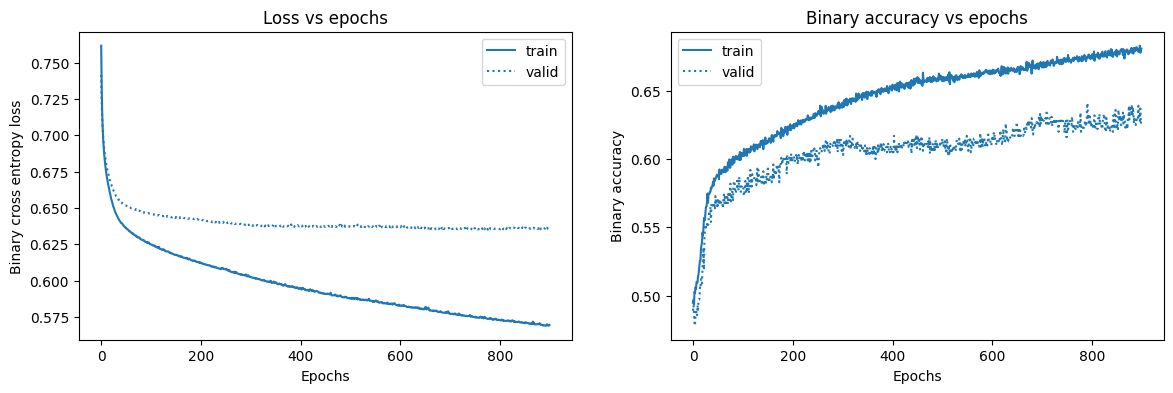

In [24]:
# Plot the learning curves

fig = plt.figure(figsize=(14, 4))

fig.add_subplot(121)
plt.plot(small_history.history['loss'], label='train', color='C0', linestyle='-')
plt.plot(small_history.history['val_loss'], label='valid', color='C0', linestyle=':')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(small_history.history['binary_accuracy'], label='train', color='C0', linestyle='-')
plt.plot(small_history.history['val_binary_accuracy'], label='valid', color='C0', linestyle=':')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()

#### Build and train the medium and large MLP models
We will now see if we can improve the model performance by increasing the model capacity. We will reuse the `get_mlp` function to build these models.

In [25]:
# Build a medium-sized MLP model

model = get_mlp(input_shape=(28,), hidden_units=[64, 64, 64])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                1856      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10241 (40.00 KB)
Trainable params: 10241 (40.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Get fresh compile and fit arguments

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

As we have silenced the printout from the `fit` method, we will create a custom callback to print the model progress less frequently than every epoch.

You should now complete the following class, which subclasses the base `Callback` class.

* The class initialiser takes one required argument, `num_epochs`, that defines the frequency to print logs
* After every `num_epochs` epochs of training, the class should print out a single line with the epoch number, training and validation loss and metric values
  * Make sure to account for the zero-indexing of python, e.g. the first epoch is numbered 0, so your class should print `epoch + 1`
* The loss and metric values should be printed to 4 decimal places (_hint: use_ `"{:.4f}".format(value)`)

In [27]:
#### GRADED CELL ####

# Complete the following class. 
# Make sure to not change the class name or provided methods and signatures.

class PrintProgress(tf.keras.callbacks.Callback):
    
    def __init__(self, num_epochs, **kwargs):
        """
        The initializer should call the base class initializer, passing in any 
        optional keyword arguments passed in
        """
        super(PrintProgress, self).__init__(**kwargs)
        self.num_epochs = num_epochs
        
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.num_epochs == 0:
            loss_and_metrics = ', '.join(['{}: {:.4f}'.format(k, v) for k, v in logs.items()])
            print("Epoch: {}, {}".format(epoch + 1, loss_and_metrics))

In [28]:
# Create an instance of your callback class

print_progress = PrintProgress(num_epochs=50)

In [29]:
# Create a checkpoint callback object for the medium MLP model

ckpt = CheckpointCallback(Path("./models/medium"))

In [30]:
# Compile and fit the medium MLP model

medium_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds, 
                                 validation_dataset=valid_ds, metrics=[bin_acc],
                                 callbacks=[early_stopping, print_progress, ckpt])

Epoch: 50, loss: 0.5923, binary_accuracy: 0.6428, val_loss: 0.6416, val_binary_accuracy: 0.6140
Epoch: 100, loss: 0.5509, binary_accuracy: 0.6925, val_loss: 0.6603, val_binary_accuracy: 0.6050
Epoch: 150, loss: 0.5154, binary_accuracy: 0.7150, val_loss: 0.6743, val_binary_accuracy: 0.6300
Epoch: 200, loss: 0.4890, binary_accuracy: 0.7439, val_loss: 0.6956, val_binary_accuracy: 0.6360


Finally, we will also build and train a large MLP model.

In [31]:
# Build a large-sized MLP model

model = get_mlp(input_shape=(28,), hidden_units=[512, 512, 512, 512])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_7 (Dense)             (None, 512)               14848     
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 803329 (3.06 MB)
Trainable params: 803329 (3.

In [32]:
# Get fresh compile and fit arguments

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

In [33]:
# Create a checkpoint callback object for the large MLP model

ckpt = CheckpointCallback(Path("./models/large"))

In [34]:
# Compile and fit the large MLP model

large_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds, 
                                validation_dataset=valid_ds, metrics=[bin_acc],
                                callbacks=[early_stopping, print_progress, ckpt])

Epoch: 50, loss: 0.4188, binary_accuracy: 0.7964, val_loss: 0.7125, val_binary_accuracy: 0.6050
Epoch: 100, loss: 0.1250, binary_accuracy: 0.9569, val_loss: 1.1559, val_binary_accuracy: 0.6100
Epoch: 150, loss: 0.0143, binary_accuracy: 0.9996, val_loss: 1.5656, val_binary_accuracy: 0.6130
Epoch: 200, loss: 0.0048, binary_accuracy: 1.0000, val_loss: 1.7156, val_binary_accuracy: 0.6120


We now compare the performance of each model by plotting the training and validation loss and metrics.

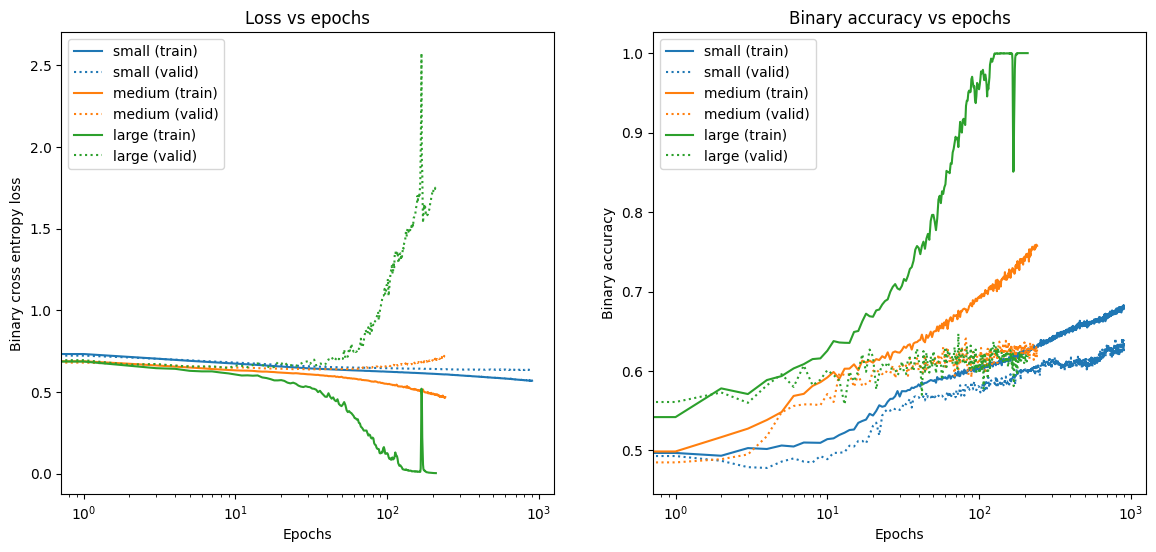

In [35]:
# Plot the learning curves for all models

fig = plt.figure(figsize=(14, 6))

fig.add_subplot(121)
plt.plot(small_history.history['loss'], label='small (train)', color='C0', linestyle='-')
plt.plot(small_history.history['val_loss'], label='small (valid)', color='C0', linestyle=':')
plt.plot(medium_history.history['loss'], label='medium (train)', color='C1', linestyle='-')
plt.plot(medium_history.history['val_loss'], label='medium (valid)', color='C1', linestyle=':')
plt.plot(large_history.history['loss'], label='large (train)', color='C2', linestyle='-')
plt.plot(large_history.history['val_loss'], label='large (valid)', color='C2', linestyle=':')
plt.xscale('log')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(small_history.history['binary_accuracy'], label='small (train)', color='C0', linestyle='-')
plt.plot(small_history.history['val_binary_accuracy'], label='small (valid)', color='C0', linestyle=':')
plt.plot(medium_history.history['binary_accuracy'], label='medium (train)', color='C1', linestyle='-')
plt.plot(medium_history.history['val_binary_accuracy'], label='medium (valid)', color='C1', linestyle=':')
plt.plot(large_history.history['binary_accuracy'], label='large (train)', color='C2', linestyle='-')
plt.plot(large_history.history['val_binary_accuracy'], label='large (valid)', color='C2', linestyle=':')
plt.xscale('log')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()

#### Regularise the large model
As we can see clearly in the above plots, the large model achieves a low loss and high accuracy, but severely overfits the training data. We will now look to regularise this model.

First, you should write a new function, `get_regularised_mlp`, to build regularised MLP models.

The function should use the functional API, and build the model according to the following specifications:

* The function has `input_shape`, `hidden_units`, `l2_reg_coeff` and `dropout_rate` arguments
* The `input_shape` should be used to define the Input layer
* The `hidden_units` argument is a list of integers (of any length), containing the number of units to use in subsequent `Dense` hidden layers
* Each `Dense` hidden layer should use a `selu` activation function
* Each `Dense` layer should use the `l2_reg_coeff` argument to set kernel $l^2$ regularisation
* After each `Dense` hidden layer, there should be a `Dropout` layer with rate `dropout_rate`
* There should also be a final output `Dense` layer with one unit and a linear (no) activation
* The function should then return the model

In [36]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_regularised_mlp(input_shape, hidden_units, l2_reg_coeff, dropout_rate):
    """
    This function is used to build the MLP model. It takes input_shape and hidden_units
    as arguments, which should be used to build the model as described above, using the
    functional API.
    Your function should return the model.
    """
    inputs = tf.keras.layers.Input(shape=input_shape)
    h = inputs
    for units in hidden_units:
        h = tf.keras.layers.Dense(units, activation='selu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l2_reg_coeff))(h)
        h = tf.keras.layers.Dropout(dropout_rate)(h)
    outputs = tf.keras.layers.Dense(1, activation=None)(h)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [37]:
# Build a regularised version of the large MLP model

model = get_regularised_mlp(input_shape=(28,), hidden_units=[512, 512, 512, 512],
                            l2_reg_coeff=0.0001, dropout_rate=0.5)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_12 (Dense)            (None, 512)               14848     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0   

In [38]:
# Get fresh compile and fit arguments

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

In [39]:
# Create a checkpoint callback object for the regularised large MLP model

ckpt = CheckpointCallback(Path("./models/reg_large"))

In [40]:
# Compile and fit the regularised large MLP model

reg_large_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds, 
                                    validation_dataset=valid_ds, metrics=[bin_acc],
                                    callbacks=[early_stopping, print_progress, ckpt])

Epoch: 50, loss: 0.7834, binary_accuracy: 0.5784, val_loss: 0.7859, val_binary_accuracy: 0.5820
Epoch: 100, loss: 0.7364, binary_accuracy: 0.6051, val_loss: 0.7435, val_binary_accuracy: 0.5830
Epoch: 150, loss: 0.6942, binary_accuracy: 0.6342, val_loss: 0.6986, val_binary_accuracy: 0.6320
Epoch: 200, loss: 0.6585, binary_accuracy: 0.6501, val_loss: 0.6676, val_binary_accuracy: 0.6430
Epoch: 250, loss: 0.6283, binary_accuracy: 0.6582, val_loss: 0.6479, val_binary_accuracy: 0.6480
Epoch: 300, loss: 0.6177, binary_accuracy: 0.6603, val_loss: 0.6372, val_binary_accuracy: 0.6570
Epoch: 350, loss: 0.6043, binary_accuracy: 0.6711, val_loss: 0.6264, val_binary_accuracy: 0.6570
Epoch: 400, loss: 0.6039, binary_accuracy: 0.6633, val_loss: 0.6273, val_binary_accuracy: 0.6450
Epoch: 450, loss: 0.6003, binary_accuracy: 0.6752, val_loss: 0.6279, val_binary_accuracy: 0.6490
Epoch: 500, loss: 0.5977, binary_accuracy: 0.6789, val_loss: 0.6268, val_binary_accuracy: 0.6670
Epoch: 550, loss: 0.5944, binar

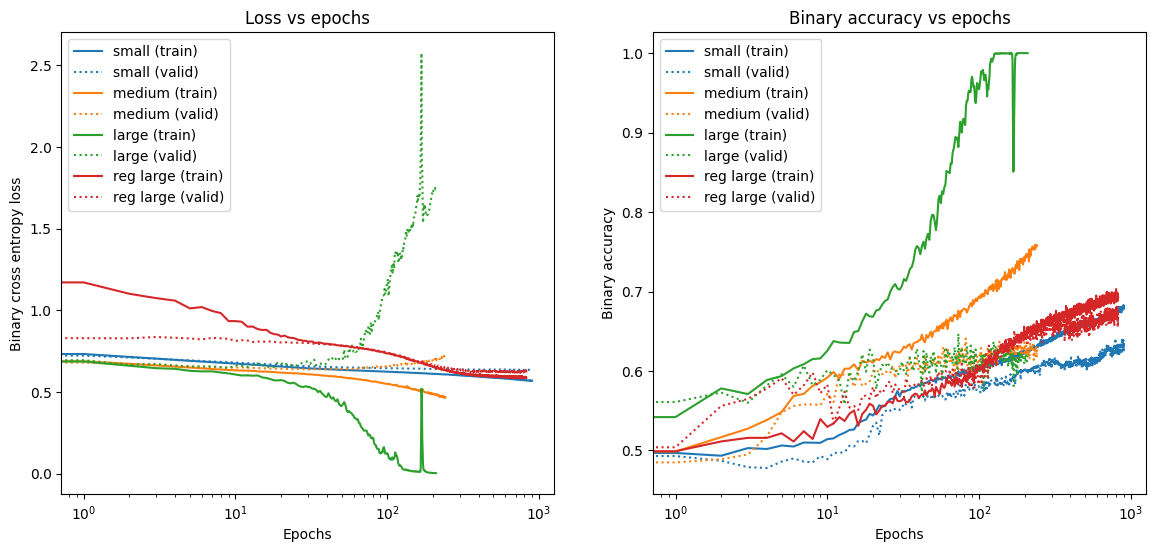

In [41]:
# Plot the learning curves for all models

fig = plt.figure(figsize=(14, 6))

fig.add_subplot(121)
plt.plot(small_history.history['loss'], label='small (train)', color='C0', linestyle='-')
plt.plot(small_history.history['val_loss'], label='small (valid)', color='C0', linestyle=':')
plt.plot(medium_history.history['loss'], label='medium (train)', color='C1', linestyle='-')
plt.plot(medium_history.history['val_loss'], label='medium (valid)', color='C1', linestyle=':')
plt.plot(large_history.history['loss'], label='large (train)', color='C2', linestyle='-')
plt.plot(large_history.history['val_loss'], label='large (valid)', color='C2', linestyle=':')
plt.plot(reg_large_history.history['loss'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_loss'], label='reg large (valid)', color='C3', linestyle=':')
plt.xscale('log')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(small_history.history['binary_accuracy'], label='small (train)', color='C0', linestyle='-')
plt.plot(small_history.history['val_binary_accuracy'], label='small (valid)', color='C0', linestyle=':')
plt.plot(medium_history.history['binary_accuracy'], label='medium (train)', color='C1', linestyle='-')
plt.plot(medium_history.history['val_binary_accuracy'], label='medium (valid)', color='C1', linestyle=':')
plt.plot(large_history.history['binary_accuracy'], label='large (train)', color='C2', linestyle='-')
plt.plot(large_history.history['val_binary_accuracy'], label='large (valid)', color='C2', linestyle=':')
plt.plot(reg_large_history.history['binary_accuracy'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_binary_accuracy'], label='reg large (valid)', color='C3', linestyle=':')
plt.xscale('log')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()

Clearly the regularisation has helped a lot to prevent overfitting in the large model.

#### Regularise with more data
Finally, we will demonstrate the regularising effect of more data. We will significantly increase the capacity of the network by making it wider and deeper.

You should now write the following function to build this model. The function should again use the functional API, and build the model according to the following specifications:

* The function has `input_shape`, `hidden_units`, `l2_reg_coeff` and `dropout_rate` arguments
* The `input_shape` should be used to define the Input layer
* The `hidden_units` argument is a list of integers (of any length), containing the number of units to use in subsequent `Dense` hidden layers
* Each `Dense` hidden layer should use a `selu` activation function
* Each `Dense` layer should use the `l2_reg_coeff` argument to set kernel $l^2$ regularisation
* After each `Dense` hidden layer, there should be a `BatchNormalization` layer
* After each `BatchNormalization` layer, there should be a `Dropout` layer with rate `dropout_rate`
* There should also be a final output `Dense` layer with one unit and a linear (no) activation
* The function should then return the model

In [42]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_regularised_bn_mlp(input_shape, hidden_units, l2_reg_coeff, dropout_rate):
    """
    This function is used to build the MLP model. It takes input_shape and hidden_units
    as arguments, which should be used to build the model as described above, using the
    functional API.
    Your function should return the model.
    """
    inputs = tf.keras.layers.Input(shape=input_shape)
    h = inputs
    for units in hidden_units:
        h = tf.keras.layers.Dense(units, activation='selu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l2_reg_coeff))(h)
        h = tf.keras.layers.BatchNormalization()(h)
        h = tf.keras.layers.Dropout(dropout_rate)(h)
    outputs = tf.keras.layers.Dense(1, activation=None)(h)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [43]:
# Build a huge MLP model

model = get_regularised_bn_mlp(input_shape=(28,), hidden_units=[1024, 1024, 1024, 512, 512, 512],
                                l2_reg_coeff=0.0001, dropout_rate=0.5)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_17 (Dense)            (None, 1024)              29696     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                          

In [44]:
# Get fresh compile and fit arguments

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

In [45]:
# Create a checkpoint callback object for the huge MLP model

ckpt = CheckpointCallback(Path("./models/huge"))

In [46]:
# Compile and fit the huge MLP model

huge_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds, 
                               validation_dataset=valid_ds, metrics=[bin_acc],
                               callbacks=[early_stopping, print_progress, ckpt])

Epoch: 50, loss: 0.9524, binary_accuracy: 0.6160, val_loss: 0.9665, val_binary_accuracy: 0.6270
Epoch: 100, loss: 0.8174, binary_accuracy: 0.6696, val_loss: 0.8338, val_binary_accuracy: 0.6610
Epoch: 150, loss: 0.7100, binary_accuracy: 0.6948, val_loss: 0.7550, val_binary_accuracy: 0.6710
Epoch: 200, loss: 0.6338, binary_accuracy: 0.7228, val_loss: 0.7049, val_binary_accuracy: 0.6800
Epoch: 250, loss: 0.5912, binary_accuracy: 0.7409, val_loss: 0.7073, val_binary_accuracy: 0.6740
Epoch: 300, loss: 0.5565, binary_accuracy: 0.7699, val_loss: 0.7506, val_binary_accuracy: 0.6740
Epoch: 350, loss: 0.5376, binary_accuracy: 0.7921, val_loss: 0.7946, val_binary_accuracy: 0.6820
Epoch: 400, loss: 0.5064, binary_accuracy: 0.8181, val_loss: 0.8845, val_binary_accuracy: 0.6790


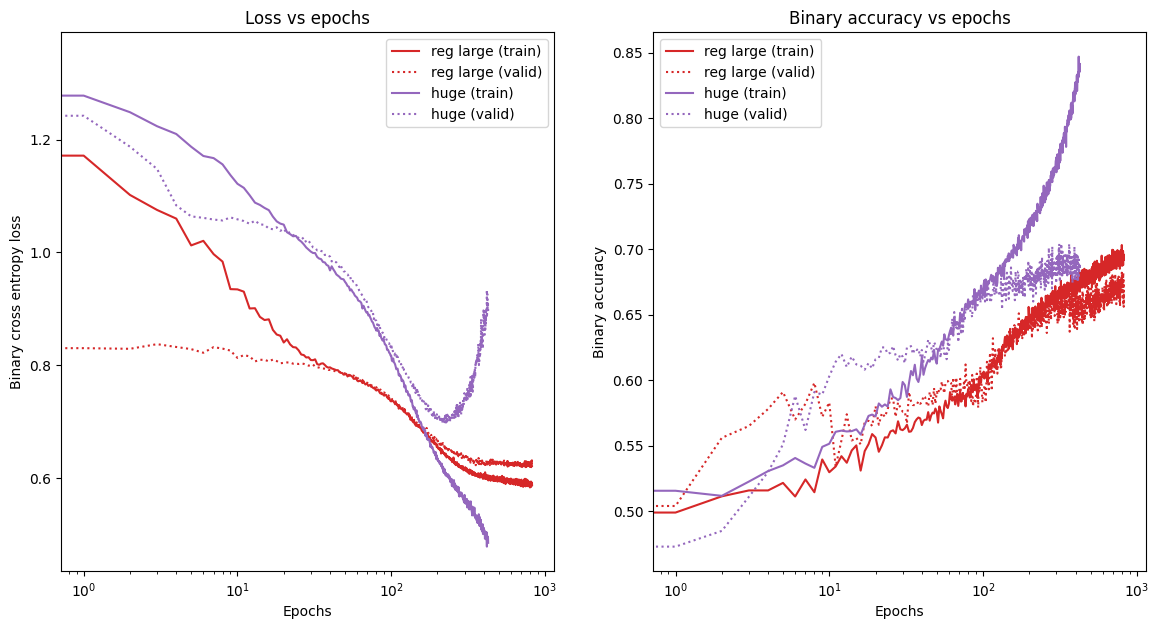

In [47]:
# Plot the performance of the huge model and large regularised model

fig = plt.figure(figsize=(14, 7))

fig.add_subplot(121)
plt.plot(reg_large_history.history['loss'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_loss'], label='reg large (valid)', color='C3', linestyle=':')
plt.plot(huge_history.history['loss'], label='huge (train)', color='C4', linestyle='-')
plt.plot(huge_history.history['val_loss'], label='huge (valid)', color='C4', linestyle=':')
plt.xscale('log')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(reg_large_history.history['binary_accuracy'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_binary_accuracy'], label='reg large (valid)', color='C3', linestyle=':')
plt.plot(huge_history.history['binary_accuracy'], label='huge (train)', color='C4', linestyle='-')
plt.plot(huge_history.history['val_binary_accuracy'], label='huge (valid)', color='C4', linestyle=':')
plt.xscale('log')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()

As we can see, this huge model is again overfitting to the training data. We will now retrain the same model on a much larger dataset to see the regularising effect of more data.

There is an additional CSV saved at `'./data/HIGGS-sample-extra.csv'` that contains an extra 50,000 data examples. You should now complete the following function to construct training, validation and test datasets using this CSV.

* The function takes the `csv_path`, `batch_size`, `map_dataset` function and `shuffle_buffer` size as arguments
* Your function should read in the CSV to a pandas `DataFrame`, using the `csv_path`. Make sure to use the option `header=None`
* Your function should then be able to operate on a numeric `DataFrame` of any shape
* It should then randomly shuffle the `DataFrame` and as before, create a train/validation/test data partition with a 80/10/10 percentage split
* It should load these data splits into `tf.data.Dataset` objects
* It should shuffle the training Dataset using the `shuffle_buffer` size, if it is not `None`
* It should then batch the training, validation and test Datasets using the `batch_size`
* It should the use your `map_dataset` function as above to parse the data into input features and targets
* Finally, it should then make a call to `prefetch`, with the argument `tf.data.experimental.AUTOTUNE` for each Dataset
* Your function should return the tuple of Dataset objects `(train_ds, valid_ds, test_ds)`

In [48]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_more_data(csv_path, batch_size, map_dataset=map_dataset, shuffle_buffer=None):
    """
    This function takes in the CSV filepath, batch_size, map_dataset function, and
    shuffle_buffer size. It should create train/valid/test Datasets according to the
    above specifications.
    Your function should then return the tuple (train_ds, valid_ds, test_ds) of Datasets.
    """
    df = pd.read_csv(csv_path, header=None)
    dataset_size = df.shape[0]
    df = df.sample(dataset_size)
    
    num_train = int(dataset_size * 0.8)
    num_valid = int(dataset_size * 0.1)
    train_ds = tf.data.Dataset.from_tensor_slices(df[:num_train].values.astype(np.float32))
    valid_ds = tf.data.Dataset.from_tensor_slices(df[num_train:num_train + num_valid].values.astype(np.float32))
    test_ds = tf.data.Dataset.from_tensor_slices(df[num_train + num_valid:].values.astype(np.float32))
    
    if shuffle_buffer is not None:
        train_ds = train_ds.shuffle(shuffle_buffer)
    
    train_ds = train_ds.batch(batch_size)
    valid_ds = valid_ds.batch(batch_size)
    test_ds = test_ds.batch(batch_size)
    
    train_ds = map_dataset(train_ds)
    valid_ds = map_dataset(valid_ds)
    test_ds = map_dataset(test_ds)
    
    train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
    valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)
    test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)
    
    return train_ds, valid_ds, test_ds

In [49]:
# Run your function to get the extra Datasets

train_ds_extra, valid_ds_extra, test_ds_extra = get_more_data(Path('./data/HIGGS-sample-extra.csv'), 500,
                                                              map_dataset, 1000)

In [50]:
# Concatenate the new Datasets with the existing ones

train_ds_full = train_ds_extra.concatenate(train_ds)
valid_ds_full = valid_ds_extra.concatenate(valid_ds)
test_ds_full = test_ds_extra.concatenate(test_ds)

In [51]:
# Build another instance of the huge MLP model

model = get_regularised_bn_mlp(input_shape=(28,), hidden_units=[1024, 1024, 1024, 512, 512, 512],
                               l2_reg_coeff=0.0001, dropout_rate=0.5)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              29696     
                                                                 
 batch_normalization_6 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 1024)              1049600   
                                                                 
 batch_normalization_7 (Bat  (None, 1024)              4096      
 chNormalization)                                          

In [52]:
# Get fresh compile and fit arguments

adam, bce_loss, bin_acc, early_stopping = get_compile_and_fit_args()

In [53]:
# Create a checkpoint callback object for the regularised huge BN MLP model

ckpt = CheckpointCallback(Path("./models/huge_full"))

This is now a very large model trained on a much bigger dataset, so will take some time to train - you might want to go make yourself a cup of tea or coffee while it's running!

In [ ]:
# Compile and fit the huge MLP model on the expanded dataset

huge_full_history = compile_and_fit(model, adam, bce_loss, 2000, train_ds_full, 
                                    validation_dataset=valid_ds_full, metrics=[bin_acc],
                                    callbacks=[early_stopping, print_progress, ckpt])

In [ ]:
# Plot the performance of the huge models and large regularised model

fig = plt.figure(figsize=(14, 7))

fig.add_subplot(121)
plt.plot(reg_large_history.history['loss'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_loss'], label='reg large (valid)', color='C3', linestyle=':')
plt.plot(huge_history.history['loss'], label='huge (train)', color='C4', linestyle='-')
plt.plot(huge_history.history['val_loss'], label='huge (valid)', color='C4', linestyle=':')
plt.plot(huge_full_history.history['loss'], label='huge full (train)', color='C5', linestyle='-')
plt.plot(huge_full_history.history['val_loss'], label='huge full (valid)', color='C5', linestyle=':')
plt.xscale('log')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(reg_large_history.history['binary_accuracy'], label='reg large (train)', color='C3', linestyle='-')
plt.plot(reg_large_history.history['val_binary_accuracy'], label='reg large (valid)', color='C3', linestyle=':')
plt.plot(huge_history.history['binary_accuracy'], label='huge (train)', color='C4', linestyle='-')
plt.plot(huge_history.history['val_binary_accuracy'], label='huge (valid)', color='C4', linestyle=':')
plt.plot(huge_full_history.history['binary_accuracy'], label='huge full (train)', color='C5', linestyle='-')
plt.plot(huge_full_history.history['val_binary_accuracy'], label='huge full (valid)', color='C5', linestyle=':')
plt.xscale('log')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()

We will conclude by evaluating each model on the held-out test dataset.

In [ ]:
# Collect evaluation loss and metrics for each model

saved_models = {
    'small': {"build_fn": get_mlp, "args": {"input_shape": (28,), "hidden_units": [16, 16]}},
    'medium': {"build_fn": get_mlp, "args": {"input_shape": (28,), "hidden_units": [64, 64, 64]}},
    'large': {"build_fn": get_mlp, "args": {"input_shape": (28,), "hidden_units": [512, 512, 512, 512]}},
    'reg_large': {"build_fn": get_regularised_mlp, "args": {
        "input_shape": (28,), "hidden_units": [512, 512, 512, 512], 
        "l2_reg_coeff": 0.0001, "dropout_rate": 0.5
    }},
    'huge': {"build_fn": get_regularised_bn_mlp, "args": {
        "input_shape": (28,), "hidden_units": [1024, 1024, 1024, 512, 512, 512], 
        "l2_reg_coeff": 0.0001, "dropout_rate": 0.5
    }},
    'huge_full': {"build_fn": get_regularised_bn_mlp, "args": {
        "input_shape": (28,), "hidden_units": [1024, 1024, 1024, 512, 512, 512], 
        "l2_reg_coeff": 0.0001, "dropout_rate": 0.5
    }}
}

evaluation = {"Model": [], "Test loss": [], "Test accuracy": []}
for model_size, options in saved_models.items():
    model = options['build_fn'](**options['args'])
    adam, bce_loss, bin_acc, _ = get_compile_and_fit_args()
    model.compile(loss=bce_loss, optimizer=adam, metrics=[bin_acc])
    status = tf.train.Checkpoint(model=model).restore(tf.train.latest_checkpoint('./models/{}'.format(model_size))).expect_partial()
    status.assert_existing_objects_matched()
    results = model.evaluate(test_ds_full, return_dict=True, verbose=0)
    evaluation["Model"].append(model_size)
    evaluation["Test loss"].append(results['loss'])
    evaluation["Test accuracy"].append(results['binary_accuracy'])
    
pd.DataFrame(evaluation)

In [ ]:
# Clean up

! rm -r ./models

Congratulations on completing this week's assignment! In this assignment you have experimented with model capacity and various forms of regularisation, and seen their effects on the model training and performance.